# Deep learning framework example: Named Entity Recognition

This notebook demonstrates how to use the deeplearning API to train and test the model on the [CoNNL 2003 dataset](https://www.clips.uantwerpen.be/conll2003/ner/).  The task is to identify named entities (i.e. people, organizations etc).

**Important**: Please see the Movie Review notebook example in the `zensols.movie` API first, as it contains more explaination of how the framework is used.  The purpose of this notebook is to run the MNIST dataset and visualize the results.

In [1]:
# environemnt configuration and set up: add this (deepnlp) library to the Python path and framework entry point
class NotebookHarness(object):
    """Configure the Jupyter notebook environment and create model resources."""
    def __init__(self, app_root_dir: str = '..', deepnlp_path: str = '../../../src/python'):
        """Set up the interpreter environment so we can import local packages.
        
        :param app_root_dir: the application root directory
        :param deepnlp_path: the path to the DeepNLP source code
        """
        import sys
        from pathlib import Path
        self.app_root_dir = Path(app_root_dir)
        # add the example to the Python library path
        sys.path.append(str(self.app_root_dir / 'src'))
        # add the deepnlp path
        sys.path.append(deepnlp_path)
        from zensols.deeplearn import TorchConfig
        # reset random state for consistency before any other packages are imported
        TorchConfig.init()

    def __call__(self, cuda_device_index: int = None, temporary_dir_name: str = None):
        """Create and return an instance a :class:`.JupyterManager`.
        
        :param cuda_device_index: the CUDA (GPU) device to use
        :param temporary_dir_name: the temporary directory to use for temporary space and results
        """
        from zensols.deeplearn.cli import JupyterManager
        from ner import CliFactory
        factory_args = {'root_dir': self.app_root_dir}
        if temporary_dir_name is not None:
            factory_args['temporary_dir'] = self.app_root_dir / temporary_dir_name
        mng = JupyterManager(
            allocation_tracking='counts',
            cli_class=CliFactory,
            factory_args=factory_args,
            cli_args_fn=lambda model: ['-c', str(self.app_root_dir / 'models' / f'{model}.conf')])
        if cuda_device_index is not None:
            # tell which GPU to use
            mng.config('gpu_torch_config', cuda_device_index=cuda_device_index)
        return mng


harness = NotebookHarness()
mng = harness()
#mng = harness(1, 'target2')

## Print information about 

Use the factory to create the model executor.  The `write` method gives statistics on the data set that is configured on the executor.

In [2]:
from zensols.config import Writable
# set indention level for human readable (pretty print) output
Writable.WRITABLE_INDENT_SPACE = 2
facade = mng.create_facade('glove50')
facade.write()

2021-07-05 21:37:31,302 [zensols.deeplearn.model.facade] creating new executor
2021-07-05 21:37:32,194 [zensols.deepnlp.embed.wordtext] reading binary vector file: ../corpus/glove/bin/6B.50/vec
2021-07-05 21:37:32,564 [zensols.deepnlp.embed.wordtext] loaded 400000 vectors in 0s
2021-07-05 21:37:32,915 [zensols.deepnlp.embed.wordtext] prepared vectors in 0s
2021-07-05 21:37:32,915 [zensols.deepnlp.embed.domain] created tensor vectory matrix on use cuda: True, device: cuda:0


executor:
  model: NER: glove_50 
  feature splits:
    split stash splits:
        test: 3453 (16.6%)
        train: 14041 (67.7%)
        dev: 3250 (15.7%)
        total: 20744


2021-07-05 21:37:36,618 [zensols.deeplearn.model.executor.status] created model on cpu with use cuda: True, device: cuda:0


    total this instance: 20744
    keys consistent: True
    delegate:
      key splits:
        test: 3453 (16.6%)
        train: 14041 (67.7%)
        dev: 3250 (15.7%)
      total: 20744
  batch splits:
    split stash splits:
        test: 108 (16.6%)
        train: 439 (67.6%)
        dev: 102 (15.7%)
        total: 649
    total this instance: 649
    keys consistent: True
    delegate:
      name: sent_batch_stash
      chunk_size: 0
      workers: 2
      batch_size: 32
      data_point_id_sets_path: ../data/batch/b32/keys.dat
      batch_limit: 9223372036854775807
      delegate_attr: True
      _has_data: True
      is_child: False
      _decoded_attributes: {'mask', 'glove_50_embedding', 'syns', 'ents', 'tags'}
      priming: False
  network settings:
    name: net_settings
    recurrent_crf_settings:
      name: recurrent_crf_settings
      dropout: 0.1
      network_type: lstm
      bidirectional: True
      hidden_size: 24
      num_layers: 1
      num_labels: 9
      dec

## Train and test the model

Train and test the model with the default (low) number of epochs to make sure everything is working.

2021-07-05 21:37:36,632 [zensols.deeplearn.model.executor.status] resetting executor
2021-07-05 21:37:36,634 [zensols.deeplearn.model.facade] training...
2021-07-05 21:37:36,642 [zensols.deeplearn.model.executor.status] batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 0
2021-07-05 21:37:36,642 [zensols.deeplearn.model.executor.status] preparing datasets using iteration: gpu
2021-07-05 21:37:36,643 [zensols.deeplearn.model.executor.status] using batch limit: 9223372036854775807 for train
2021-07-05 21:37:40,684 [zensols.deeplearn.model.executor.status] using batch limit: 9223372036854775807 for dev
2021-07-05 21:37:41,586 [zensols.deeplearn.model.executor.status] loaded 541 batches in 4s
2021-07-05 21:37:41,587 [zensols.deeplearn.model.executor.status] train/test sets: 439 102
2021-07-05 21:37:41,592 [zensols.deeplearn.model.executor.status] created model on cpu with use cuda: True, device: cuda:0
2021-07-05 21:37:41,631 [zensols.deeplearn.model.executor.status] 

Name: NER: glove_50 : 1
Run index: 2
Learning rate: 0.001
  train:
    started: 07/05/2021 21:37:41:684495
    ended: 07/05/2021 21:38:20:450303
    batches: 439
    ave data points per batch/total: 32.0/14041
    min/ave/max loss: 1539.73608/3707.11770/7965.04328
  validation:
    started: 07/05/2021 21:37:59:484085
    ended: 07/05/2021 21:38:23:318281
    batches: 102
    ave data points per batch/total: 503.5/51362
    converged/epochs: 2/2
    min/ave/max loss: 1345.47699/3050.42521/9157.01098
    accuracy: 0.944 (48497/51362)
    micro: F1: 0.944, precision: 0.944, recall: 0.944
    macro: F1: 0.607, precision: 0.785, recall: 0.590
    weighted: F1: 0.936, precision: 0.940, recall: 0.944
  test:
    started: 07/05/2021 21:38:25:440506
    ended: 07/05/2021 21:38:26:919564
    batches: 108
    ave data points per batch/total: 430.0/46435
    min/ave/max loss: 0.00000/0.00000/0.00000
    accuracy: 0.940 (43654/46435)
    micro: F1: 0.940, precision: 0.940, recall: 0.940
    macro: 

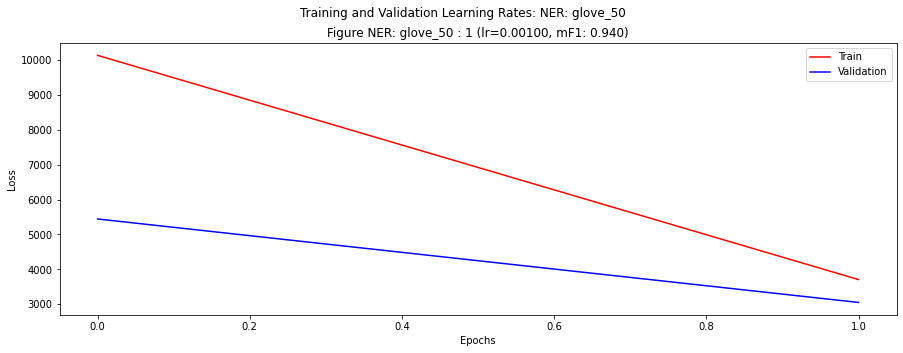

In [3]:
facade.epochs = 2
mng.run()

## Tune hyperparameters

Set model parameters to get a feel for where they need to be before changing features.  Start with Glove 50 dimensional word embeddings with a learning rate of 0.01 and 20 epochs.

2021-07-05 21:38:27,328 [zensols.deeplearn.model.executor.status] resetting executor
2021-07-05 21:38:27,329 [zensols.deeplearn.model.facade] training...
2021-07-05 21:38:27,331 [zensols.deeplearn.model.executor.status] batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 2
2021-07-05 21:38:27,332 [zensols.deeplearn.model.executor.status] train/test sets: 439 102
2021-07-05 21:38:27,409 [zensols.deeplearn.model.executor.status] created model on cpu with use cuda: True, device: cuda:0
2021-07-05 21:38:27,448 [zensols.deeplearn.model.executor.status] training model <class 'zensols.deepnlp.layer.embrecurcrf.EmbeddedRecurrentCRF'> on cuda:0 for 10 epochs using learning rate 0.01
tr:474.571|va min:1055.598|va:1169.002|lr:0.01 /\: 100%|████████████████████████████████| 10/10 [03:28<00:00, 20.65s/it]2021-07-05 21:41:55,683 [zensols.deeplearn.model.executor.status] epoch threshold reached at 10
2021-07-05 21:41:55,683 [zensols.deeplearn.model.executor.status] final minimum 

Name: NER: glove_50 : 1
Run index: 2
Learning rate: 0.01
  train:
    started: 07/05/2021 21:38:27:451005
    ended: 07/05/2021 21:41:52:848210
    batches: 439
    ave data points per batch/total: 32.0/14041
    min/ave/max loss: 59.54613/474.57114/1699.38886
  validation:
    started: 07/05/2021 21:38:45:012429
    ended: 07/05/2021 21:41:55:680154
    batches: 102
    ave data points per batch/total: 503.5/51362
    converged/epochs: 5/10
    min/ave/max loss: 300.67016/1055.59843/3338.76575
    accuracy: 0.976 (50105/51362)
    micro: F1: 0.976, precision: 0.976, recall: 0.976
    macro: F1: 0.866, precision: 0.890, recall: 0.847
    weighted: F1: 0.975, precision: 0.975, recall: 0.976
  test:
    started: 07/05/2021 21:41:56:953351
    ended: 07/05/2021 21:41:58:346229
    batches: 108
    ave data points per batch/total: 430.0/46435
    min/ave/max loss: 0.00000/0.00000/0.00000
    accuracy: 0.967 (44883/46435)
    micro: F1: 0.967, precision: 0.967, recall: 0.967
    macro: F1: 

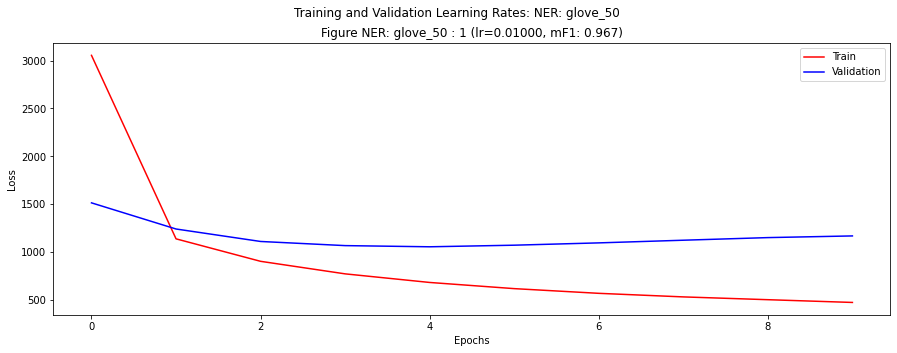

In [4]:
facade.learning_rate = 0.01
facade.epochs = 10
mng.run()

# Glove 300 embeddings

Next we use the same learning rate, but switch to the 300 dimension version of the embeddings.  The number of epochs is reduced because I have run the test before I know at what epoch the validation loss converges.  Since the model is saved only when the validation loss decreases, we early stop at 8 epochs.

2021-07-05 21:41:58,711 [zensols.deepnlp.embed.wordtext] reading binary vector file: ../corpus/glove/bin/6B.300/vec
2021-07-05 21:41:59,563 [zensols.deepnlp.embed.wordtext] loaded 400000 vectors in 0s
2021-07-05 21:42:00,288 [zensols.deepnlp.embed.wordtext] prepared vectors in 0s
2021-07-05 21:42:00,289 [zensols.deepnlp.embed.domain] created tensor vectory matrix on use cuda: True, device: cuda:0
2021-07-05 21:42:00,448 [zensols.deeplearn.model.facade] clearing
2021-07-05 21:42:00,728 [zensols.deeplearn.model.facade] creating new executor
2021-07-05 21:42:00,740 [zensols.deepnlp.embed.wordtext] reading binary vector file: ../corpus/glove/bin/6B.300/vec
2021-07-05 21:42:01,608 [zensols.deepnlp.embed.wordtext] loaded 400000 vectors in 0s
2021-07-05 21:42:02,372 [zensols.deepnlp.embed.wordtext] prepared vectors in 0s
2021-07-05 21:42:02,373 [zensols.deepnlp.embed.domain] created tensor vectory matrix on use cuda: True, device: cuda:0
2021-07-05 21:42:02,554 [zensols.deeplearn.model.execut

Name: NER: glove_50 : 1
Run index: 2
Learning rate: 0.01
  train:
    started: 07/05/2021 21:42:08:163138
    ended: 07/05/2021 21:45:00:703309
    batches: 439
    ave data points per batch/total: 32.0/14041
    min/ave/max loss: 32.46873/278.06192/1428.36177
  validation:
    started: 07/05/2021 21:42:26:709780
    ended: 07/05/2021 21:45:03:917452
    batches: 102
    ave data points per batch/total: 503.5/51362
    converged/epochs: 3/8
    min/ave/max loss: 187.00793/1071.06605/3612.62720
    accuracy: 0.978 (50225/51362)
    micro: F1: 0.978, precision: 0.978, recall: 0.978
    macro: F1: 0.884, precision: 0.897, recall: 0.872
    weighted: F1: 0.978, precision: 0.978, recall: 0.978
  test:
    started: 07/05/2021 21:45:06:765260
    ended: 07/05/2021 21:45:08:335137
    batches: 108
    ave data points per batch/total: 430.0/46435
    min/ave/max loss: 0.00000/0.00000/0.00000
    accuracy: 0.964 (44785/46435)
    micro: F1: 0.964, precision: 0.964, recall: 0.964
    macro: F1: 0

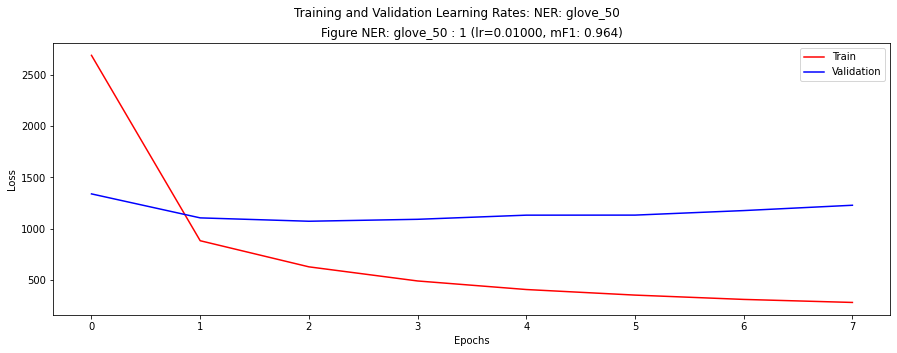

In [5]:
facade.epochs = 8
facade.embedding = 'glove_300_embedding'
mng.run()

# Word2vec Embeddings

Now we switch to the Google 300D word2vec pretrained vectors using 12 epochs, even though it has converged at 9 epochs previously.

2021-07-05 21:45:08,722 [zensols.deepnlp.embed.word2vec] reading binary vector file
2021-07-05 21:45:08,723 [zensols.deepnlp.embed.word2vec] loading keyed file: ../corpus/word2vec/GoogleNews-vectors-negative300.bin
2021-07-05 21:46:05,385 [zensols.deepnlp.embed.word2vec] loaded key model from /home/landes/view/nlp/deepnlp/example/ner/notebook/../corpus/word2vec/GoogleNews-vectors-negative300.bin in 56s
2021-07-05 21:46:05,386 [zensols.deepnlp.embed.word2vec] loaded word2vec model in 56s
2021-07-05 21:46:18,324 [zensols.deepnlp.embed.word2vec] created data structures in 12s
2021-07-05 21:46:20,726 [zensols.deepnlp.embed.domain] created tensor vectory matrix on use cuda: True, device: cuda:0
2021-07-05 21:46:21,921 [zensols.deeplearn.model.facade] clearing
2021-07-05 21:46:22,120 [zensols.deeplearn.model.facade] creating new executor
2021-07-05 21:46:22,133 [zensols.deepnlp.embed.word2vec] reading binary vector file
2021-07-05 21:46:22,134 [zensols.deepnlp.embed.word2vec] loading keyed f

Name: NER: glove_50 : 1
Run index: 2
Learning rate: 0.01
  train:
    started: 07/05/2021 21:47:47:214904
    ended: 07/05/2021 21:52:13:789945
    batches: 439
    ave data points per batch/total: 32.0/14041
    min/ave/max loss: 13.17482/129.39439/615.11305
  validation:
    started: 07/05/2021 21:48:06:046597
    ended: 07/05/2021 21:52:17:049721
    batches: 102
    ave data points per batch/total: 503.5/51362
    converged/epochs: 4/12
    min/ave/max loss: 192.49699/916.00018/3143.01009
    accuracy: 0.980 (50337/51362)
    micro: F1: 0.980, precision: 0.980, recall: 0.980
    macro: F1: 0.889, precision: 0.902, recall: 0.879
    weighted: F1: 0.980, precision: 0.980, recall: 0.980
  test:
    started: 07/05/2021 21:52:25:228373
    ended: 07/05/2021 21:52:26:803991
    batches: 108
    ave data points per batch/total: 430.0/46435
    min/ave/max loss: 0.00000/0.00000/0.00000
    accuracy: 0.968 (44932/46435)
    micro: F1: 0.968, precision: 0.968, recall: 0.968
    macro: F1: 0.

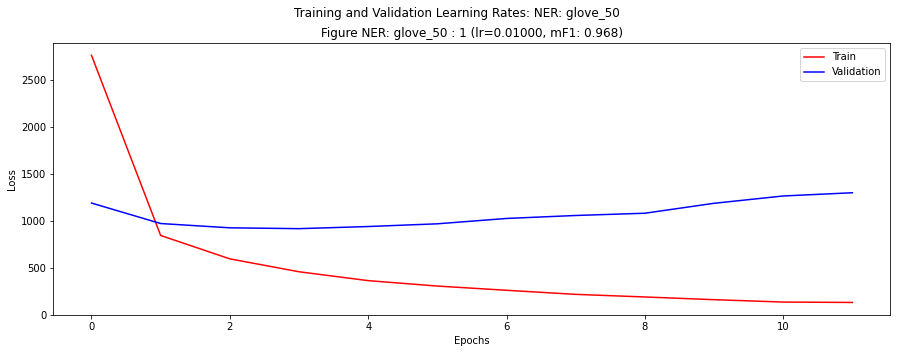

In [6]:
facade.epochs = 12
facade.embedding = 'word2vec_300_embedding'
mng.run()

# BERT Embeddings

Now we test with Bert context aware frozen (not trainable) embeddings using 10 epochs.  We must empty the `net_settings` attributes, which are the lingustic features, since Bert tokenizes using the word piece algorithm and the tensor shapes will not align.  We'll address this later.

2021-07-05 21:52:28,728 [zensols.deeplearn.model.facade] creating new executor
2021-07-05 21:52:32,129 [zensols.deeplearn.model.executor.status] resetting executor
2021-07-05 21:52:32,130 [zensols.deeplearn.model.facade] training...
2021-07-05 21:52:32,202 [zensols.deeplearn.model.executor.status] batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 0
2021-07-05 21:52:32,203 [zensols.deeplearn.model.executor.status] preparing datasets using iteration: gpu
2021-07-05 21:52:32,203 [zensols.deeplearn.model.executor.status] using batch limit: 9223372036854775807 for train
2021-07-05 21:52:33,242 [zensols.deeplearn.model.executor.status] using batch limit: 9223372036854775807 for dev
2021-07-05 21:52:33,492 [zensols.deeplearn.model.executor.status] loaded 541 batches in 1s
2021-07-05 21:52:33,492 [zensols.deeplearn.model.executor.status] train/test sets: 439 102
2021-07-05 21:52:33,855 [zensols.deeplearn.model.executor.status] created model on cpu with use cuda: True, de

Name: NER: transformer_trainable : 1
Run index: 2
Learning rate: 5e-05
  train:
    started: 07/05/2021 21:52:34:035742
    ended: 07/05/2021 22:51:21:722910
    batches: 439
    ave data points per batch/total: 463.8/203621
    min/ave/max loss: 1.13798/2.41786/7.25515
  validation:
    started: 07/05/2021 22:06:17:246641
    ended: 07/05/2021 22:52:37:999011
    batches: 102
    ave data points per batch/total: 503.5/51362
    converged/epochs: 1/4
    min/ave/max loss: 0.32051/2.26096/7.00217
    accuracy: 0.988 (50757/51362)
    micro: F1: 0.988, precision: 0.988, recall: 0.988
    macro: F1: 0.934, precision: 0.940, recall: 0.928
    weighted: F1: 0.988, precision: 0.988, recall: 0.988
  test:
    started: 07/05/2021 22:52:41:718883
    ended: 07/05/2021 22:53:56:892803
    batches: 108
    ave data points per batch/total: 430.0/46435
    min/ave/max loss: 0.39617/4.20035/9.72218
    accuracy: 0.980 (45513/46435)
    micro: F1: 0.980, precision: 0.980, recall: 0.980
    macro: F1:

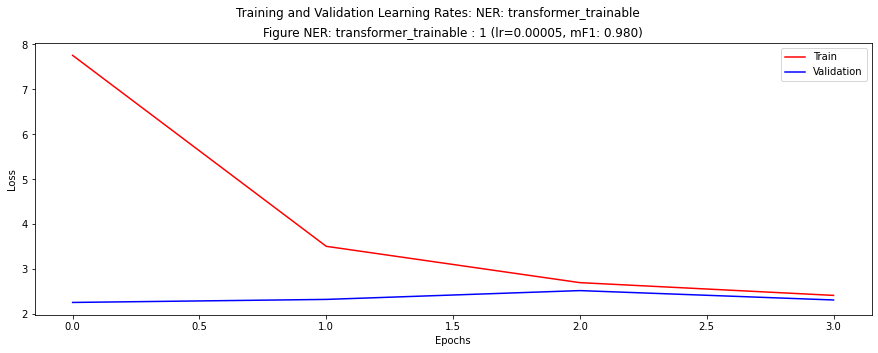

In [7]:
facade = mng.create_facade('transformer-trainable')
mng.run()

2021-07-05 22:53:57,939 [zensols.deeplearn.model.facade] creating new executor
2021-07-05 22:54:01,183 [zensols.deeplearn.model.executor.status] resetting executor
2021-07-05 22:54:01,184 [zensols.deeplearn.model.facade] training...
2021-07-05 22:54:01,254 [zensols.deeplearn.model.executor.status] batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 0
2021-07-05 22:54:01,255 [zensols.deeplearn.model.executor.status] preparing datasets using iteration: gpu
2021-07-05 22:54:01,255 [zensols.deeplearn.model.executor.status] using batch limit: 9223372036854775807 for train
2021-07-05 22:54:02,317 [zensols.deeplearn.model.executor.status] using batch limit: 9223372036854775807 for dev
2021-07-05 22:54:02,560 [zensols.deeplearn.model.executor.status] loaded 541 batches in 1s
2021-07-05 22:54:02,560 [zensols.deeplearn.model.executor.status] train/test sets: 439 102
2021-07-05 22:54:02,908 [zensols.deeplearn.model.executor.status] created model on cpu with use cuda: True, de

Name: NER: transformer_trainable : 1
Run index: 2
Learning rate: 5e-05
  train:
    started: 07/05/2021 22:54:03:087018
    ended: 07/06/2021 00:08:00:676140
    batches: 439
    ave data points per batch/total: 463.8/203621
    min/ave/max loss: 1.09504/2.24048/5.38957
  validation:
    started: 07/05/2021 23:07:47:112983
    ended: 07/06/2021 00:09:16:878681
    batches: 102
    ave data points per batch/total: 503.5/51362
    converged/epochs: 2/5
    min/ave/max loss: 0.18607/2.17608/9.05081
    accuracy: 0.989 (50817/51362)
    micro: F1: 0.989, precision: 0.989, recall: 0.989
    macro: F1: 0.943, precision: 0.945, recall: 0.942
    weighted: F1: 0.989, precision: 0.989, recall: 0.989
  test:
    started: 07/06/2021 00:09:20:780106
    ended: 07/06/2021 00:10:36:001392
    batches: 108
    ave data points per batch/total: 430.0/46435
    min/ave/max loss: 0.38573/5.13140/15.77601
    accuracy: 0.979 (45466/46435)
    micro: F1: 0.979, precision: 0.979, recall: 0.979
    macro: F1

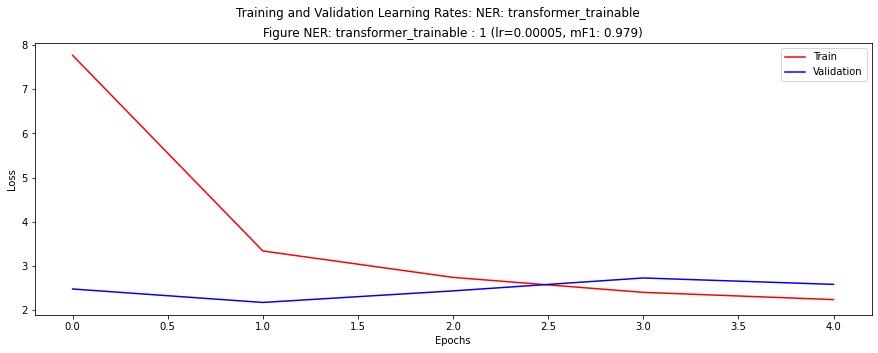

In [8]:
mng.clear()
facade = mng.create_facade('transformer-trainable')
facade.net_settings.add_attributes = ('syns_expander', 'tags_expander')
facade.epochs = 5
mng.run()

2021-07-06 00:10:37,039 [zensols.deeplearn.model.facade] creating new executor
2021-07-06 00:10:40,714 [zensols.deeplearn.model.executor.status] resetting executor
2021-07-06 00:10:40,715 [zensols.deeplearn.model.facade] training...
2021-07-06 00:10:40,784 [zensols.deeplearn.model.executor.status] batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 0
2021-07-06 00:10:40,785 [zensols.deeplearn.model.executor.status] preparing datasets using iteration: gpu
2021-07-06 00:10:40,785 [zensols.deeplearn.model.executor.status] using batch limit: 9223372036854775807 for train
2021-07-06 00:10:41,820 [zensols.deeplearn.model.executor.status] using batch limit: 9223372036854775807 for dev
2021-07-06 00:10:42,055 [zensols.deeplearn.model.executor.status] loaded 541 batches in 1s
2021-07-06 00:10:42,056 [zensols.deeplearn.model.executor.status] train/test sets: 439 102
2021-07-06 00:10:42,457 [zensols.deeplearn.model.executor.status] created model on cpu with use cuda: True, de

Name: NER: transformer_trainable : 1
Run index: 2
Learning rate: 5e-05
  train:
    started: 07/06/2021 00:10:42:665573
    ended: 07/06/2021 02:10:44:349605
    batches: 439
    ave data points per batch/total: 463.8/203621
    min/ave/max loss: 1.60305/3.46813/7.64789
  validation:
    started: 07/06/2021 00:24:29:461621
    ended: 07/06/2021 02:12:01:094219
    batches: 102
    ave data points per batch/total: 503.5/51362
    converged/epochs: 5/8
    min/ave/max loss: 3.13739/8.02066/16.90124
    accuracy: 0.955 (49038/51362)
    micro: F1: 0.955, precision: 0.955, recall: 0.955
    macro: F1: 0.806, precision: 0.833, recall: 0.784
    weighted: F1: 0.954, precision: 0.954, recall: 0.955
  test:
    started: 07/06/2021 02:12:05:840553
    ended: 07/06/2021 02:13:21:601658
    batches: 108
    ave data points per batch/total: 430.0/46435
    min/ave/max loss: 4.85991/11.41611/23.49188
    accuracy: 0.940 (43639/46435)
    micro: F1: 0.940, precision: 0.940, recall: 0.940
    macro: 

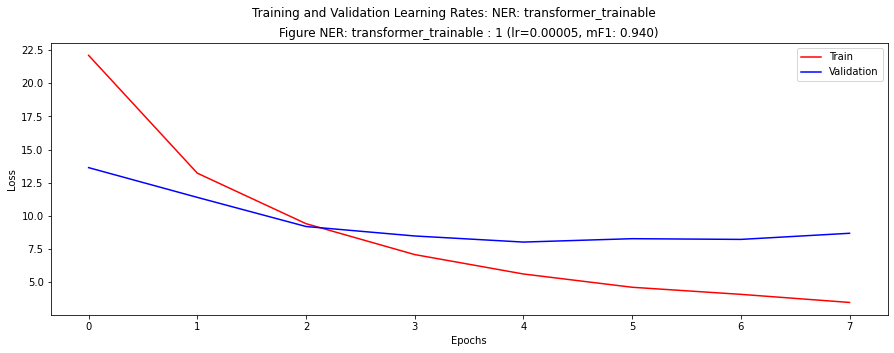

In [9]:
mng.clear()
mng.config('transformer_trainable_resource', model_id='roberta-base')
facade = mng.create_facade('transformer-trainable')
facade.epochs = 8
mng.run()

2021-07-06 02:13:22,676 [zensols.deeplearn.model.facade] creating new executor
2021-07-06 02:13:29,359 [zensols.deeplearn.model.executor.status] resetting executor
2021-07-06 02:13:29,360 [zensols.deeplearn.model.facade] training...
2021-07-06 02:13:30,441 [zensols.deeplearn.batch.multi] sent_batch_stash: spawning work with chunk size 1298 across 2 workers
2021-07-06 02:13:30,583 [zensols.deeplearn.batch.multi] using torch multiproc pool: <multiprocessing.pool.Pool state=RUN pool_size=2>
2021-07-06 02:16:51,709 [zensols.deeplearn.batch.multi] processed chunks in 3 minutes, 21s
2021-07-06 02:16:51,972 [zensols.multi.stash] completed work in BatchStash in 3 minutes, 21s
2021-07-06 02:16:52,108 [zensols.deeplearn.model.executor.status] batch iteration: cpu, limit: 9223372036854775807, caching: True, cached: 0
2021-07-06 02:16:52,109 [zensols.deeplearn.model.executor.status] preparing datasets using iteration: cpu
2021-07-06 02:16:52,109 [zensols.deeplearn.model.executor.status] using batc

Name: transformer_trainable_large: 1
Run index: 2
Learning rate: 5e-05
  train:
    started: 07/06/2021 02:16:55:993511
    ended: 07/06/2021 06:17:28:282446
    batches: 1756
    ave data points per batch/total: 116.0/203621
    min/ave/max loss: 0.08551/1.03799/7.41219
  validation:
    started: 07/06/2021 03:01:59:576460
    ended: 07/06/2021 06:21:07:721545
    batches: 407
    ave data points per batch/total: 126.2/51362
    converged/epochs: 2/5
    min/ave/max loss: 0.00157/0.71462/5.80089
    accuracy: 0.989 (50788/51362)
    micro: F1: 0.989, precision: 0.989, recall: 0.989
    macro: F1: 0.940, precision: 0.948, recall: 0.932
    weighted: F1: 0.989, precision: 0.989, recall: 0.989
  test:
    started: 07/06/2021 06:21:19:274596
    ended: 07/06/2021 06:24:52:860734
    batches: 432
    ave data points per batch/total: 107.5/46435
    min/ave/max loss: 0.00188/1.26163/7.24329
    accuracy: 0.980 (45509/46435)
    micro: F1: 0.980, precision: 0.980, recall: 0.980
    macro: F1

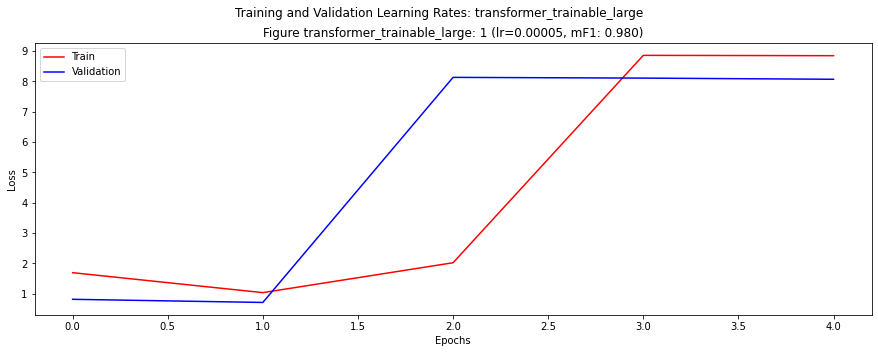

In [10]:
mng.clear()
facade = mng.create_facade('transformer-trainable-large')
mng.run()